In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)

In [3]:
shsat = pd.read_csv('nytdf.csv')

In [4]:
shsat.head()

,DBN,DataName,SchoolName1,SchoolName2,NumSHSATTestTakers,NumSpecializedOffers,OffersPerStudent,PctBlackOrHispanic
0,20K187,THE CHRISTA MCAULIFFE SCHOOL\I.S. 187,Intermediate School 187,The Christa McAuliffe School,251,205,75%,8%
1,21K239,MARK TWAIN I.S. 239 FOR THE GIFTED & TALENTED,Intermediate School 239,The Mark Twain Intermediate School for the Gif...,336,196,46%,13%
2,03M054,J.H.S. 054 BOOKER T. WASHINGTON,Junior High School 54,The Booker T. Washington School,257,150,53%,23%
3,15K051,M.S. 51 WILLIAM ALEXANDER,Midde School 51,The William Alexander School,280,122,33%,28%
4,02M312,NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...,NaN,New York City Lab Middle School for Collaborat...,163,113,62%,8%


In [4]:
shsat.shape

(589, 8)

In [5]:
shsat.dtypes

DBN                     object
DataName                object
SchoolName1             object
SchoolName2             object
NumSHSATTestTakers      object
NumSpecializedOffers    object
OffersPerStudent        object
PctBlackOrHispanic      object
dtype: object

In [6]:
shsat.NumSHSATTestTakers.value_counts()

0-5    52
6      19
10     17
9      17
7      17
13     15
15     15
24     15
16     15
21     14
8      14
20     13
29     13
12     13
17     13
18     13
27     12
35     12
11     12
22     11
23     10
19     10
42     10
26     10
38      7
14      7
37      7
36      7
46      6
39      6
       ..
309     1
233     1
372     1
157     1
236     1
336     1
90      1
181     1
80      1
160     1
272     1
133     1
55      1
194     1
370     1
189     1
206     1
114     1
270     1
132     1
169     1
211     1
89      1
63      1
280     1
91      1
78      1
394     1
264     1
171     1
Name: NumSHSATTestTakers, Length: 131, dtype: int64

In [5]:
shsat.NumSpecializedOffers.value_counts()

0-5    469
7       13
9        9
8        8
6        7
27       5
19       4
23       4
17       4
26       4
14       4
53       3
11       3
20       3
22       2
29       2
46       2
18       2
21       2
15       2
13       2
95       2
34       1
24       1
25       1
12       1
10       1
30       1
33       1
205      1
38       1
79       1
150      1
122      1
113      1
104      1
101      1
93       1
91       1
86       1
84       1
82       1
77       1
196      1
75       1
73       1
70       1
62       1
59       1
58       1
54       1
52       1
51       1
49       1
40       1
Name: NumSpecializedOffers, dtype: int64

In [6]:
shsat[(shsat.NumSpecializedOffers == '0-5') & (shsat.NumSHSATTestTakers != '0-5')].NumSHSATTestTakers.value_counts()

6      19
9      17
10     17
7      17
13     15
       ..
55      1
54      1
51      1
48      1
179     1
Name: NumSHSATTestTakers, Length: 68, dtype: int64

There are 52 schools around 10% of the data which sent fewer than 6 students to take the SHSAT. There are a total of 469 schools with fewer than 6 students receiving offer after taking the test. 

In [7]:
data = pd.read_csv('data_cleaned.csv')

In [10]:
data.head()

,Adjusted_Grade,New?,Other_Location_Code_in_LCGMS,School_Name,SED_Code,Location_Code,District,Latitude,Longitude,Address_(Full),City,Zip,Grades,Grade_Low,Grade_High,Community_School?,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic,Percent_Black_/_Hispanic,Percent_White,Student_Attendance_Rate,Percent_of_Students_Chronically_Absent,Rigorous_Instruction_%,Rigorous_Instruction_Rating,Collaborative_Teachers_%,Collaborative_Teachers_Rating,Supportive_Environment_%,Supportive_Environment_Rating,Effective_School_Leadership_%,Effective_School_Leadership_Rating,Strong_FamilyCommunity_Ties_%,Strong_FamilyCommunity_Ties_Rating,Trust_%,Trust_Rating,Student_Achievement_Rating,Average_ELA_Proficiency,Average_Math_Proficiency,Grade_3_ELAAll_Students_Tested,Grade_3_ELA_4sAll_Students,Grade_3_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_3_ELA_4sBlack_or_African_American,Grade_3_ELA_4sHispanic_or_Latino,Grade_3_ELA_4sAsian_or_Pacific_Islander,Grade_3_ELA_4sWhite,Grade_3_ELA_4sMultiracial,Grade_3_ELA_4sLimited_English_Proficient,Grade_3_ELA_4sEconomically_Disadvantaged,Grade_3_MathAll_Students_tested,Grade_3_Math_4sAll_Students,Grade_3_Math_4sAmerican_Indian_or_Alaska_Native,Grade_3_Math_4sBlack_or_African_American,Grade_3_Math_4sHispanic_or_Latino,Grade_3_Math_4sAsian_or_Pacific_Islander,Grade_3_Math_4sWhite,Grade_3_Math_4sMultiracial,Grade_3_Math_4sLimited_English_Proficient,Grade_3_Math_4sEconomically_Disadvantaged,Grade_4_ELAAll_Students_Tested,Grade_4_ELA_4sAll_Students,Grade_4_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_4_ELA_4sBlack_or_African_American,Grade_4_ELA_4sHispanic_or_Latino,Grade_4_ELA_4sAsian_or_Pacific_Islander,Grade_4_ELA_4sWhite,Grade_4_ELA_4sMultiracial,Grade_4_ELA_4sLimited_English_Proficient,Grade_4_ELA_4sEconomically_Disadvantaged,Grade_4_MathAll_Students_Tested,Grade_4_Math_4sAll_Students,Grade_4_Math_4sAmerican_Indian_or_Alaska_Native,Grade_4_Math_4sBlack_or_African_American,Grade_4_Math_4sHispanic_or_Latino,Grade_4_Math_4sAsian_or_Pacific_Islander,Grade_4_Math_4sWhite,Grade_4_Math_4sMultiracial,Grade_4_Math_4sLimited_English_Proficient,Grade_4_Math_4sEconomically_Disadvantaged,Grade_5_ELAAll_Students_Tested,Grade_5_ELA_4sAll_Students,Grade_5_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_5_ELA_4sBlack_or_African_American,Grade_5_ELA_4sHispanic_or_Latino,Grade_5_ELA_4sAsian_or_Pacific_Islander,Grade_5_ELA_4sWhite,Grade_5_ELA_4sMultiracial,Grade_5_ELA_4sLimited_English_Proficient,Grade_5_ELA_4sEconomically_Disadvantaged,Grade_5_MathAll_Students_Tested,Grade_5_Math_4sAll_Students,Grade_5_Math_4sAmerican_Indian_or_Alaska_Native,Grade_5_Math_4sBlack_or_African_American,Grade_5_Math_4sHispanic_or_Latino,Grade_5_Math_4sAsian_or_Pacific_Islander,Grade_5_Math_4sWhite,Grade_5_Math_4sMultiracial,Grade_5_Math_4sLimited_English_Proficient,Grade_5_Math_4sEconomically_Disadvantaged,Grade_6_ELAAll_Students_Tested,Grade_6_ELA_4sAll_Students,Grade_6_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_6_ELA_4sBlack_or_African_American,Grade_6_ELA_4sHispanic_or_Latino,Grade_6_ELA_4sAsian_or_Pacific_Islander,Grade_6_ELA_4sWhite,Grade_6_ELA_4sMultiracial,Grade_6_ELA_4sLimited_English_Proficient,Grade_6_ELA_4sEconomically_Disadvantaged,Grade_6_MathAll_Students_Tested,Grade_6_Math_4sAll_Students,Grade_6_Math_4sAmerican_Indian_or_Alaska_Native,Grade_6_Math_4sBlack_or_African_American,Grade_6_Math_4sHispanic_or_Latino,Grade_6_Math_4sAsian_or_Pacific_Islander,Grade_6_Math_4sWhite,Grade_6_Math_4sMultiracial,Grade_6_Math_4sLimited_English_Proficient,Grade_6_Math_4sEconomically_Disadvantaged,Grade_7_ELAAll_Students_Tested,Grade_7_ELA_4sAll_Students,Grade_7_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_7_ELA_4sBlack_or_African_American,Grade_7_ELA_4sHispanic_or_Latino,Grade_7_ELA_4sAsian_or_Pacific_Islander,Grade_7_ELA_4sWhite,Grade_7_ELA_4sMultiracial,Grade_7_ELA_4sLimited_English_Proficient,Grade_7_ELA_4sEconomically_Disadvantaged,Grade_7_MathAll_Students_Tested,Grade_7_Math_4sAll_Students,Grade_7_Math_

In [8]:
school = shsat.merge(data, left_on = 'DBN', right_on = 'Location_Code', how = 'inner')
school.shape

(580, 169)

In [9]:
school.head()

,DBN,DataName,SchoolName1,SchoolName2,NumSHSATTestTakers,NumSpecializedOffers,OffersPerStudent,PctBlackOrHispanic,Adjusted_Grade,New?,Other_Location_Code_in_LCGMS,School_Name,SED_Code,Location_Code,District,Latitude,Longitude,Address_(Full),City,Zip,Grades,Grade_Low,Grade_High,Community_School?,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic,Percent_Black_/_Hispanic,Percent_White,Student_Attendance_Rate,Percent_of_Students_Chronically_Absent,Rigorous_Instruction_%,Rigorous_Instruction_Rating,Collaborative_Teachers_%,Collaborative_Teachers_Rating,Supportive_Environment_%,Supportive_Environment_Rating,Effective_School_Leadership_%,Effective_School_Leadership_Rating,Strong_FamilyCommunity_Ties_%,Strong_FamilyCommunity_Ties_Rating,Trust_%,Trust_Rating,Student_Achievement_Rating,Average_ELA_Proficiency,Average_Math_Proficiency,Grade_3_ELAAll_Students_Tested,Grade_3_ELA_4sAll_Students,Grade_3_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_3_ELA_4sBlack_or_African_American,Grade_3_ELA_4sHispanic_or_Latino,Grade_3_ELA_4sAsian_or_Pacific_Islander,Grade_3_ELA_4sWhite,Grade_3_ELA_4sMultiracial,Grade_3_ELA_4sLimited_English_Proficient,Grade_3_ELA_4sEconomically_Disadvantaged,Grade_3_MathAll_Students_tested,Grade_3_Math_4sAll_Students,Grade_3_Math_4sAmerican_Indian_or_Alaska_Native,Grade_3_Math_4sBlack_or_African_American,Grade_3_Math_4sHispanic_or_Latino,Grade_3_Math_4sAsian_or_Pacific_Islander,Grade_3_Math_4sWhite,Grade_3_Math_4sMultiracial,Grade_3_Math_4sLimited_English_Proficient,Grade_3_Math_4sEconomically_Disadvantaged,Grade_4_ELAAll_Students_Tested,Grade_4_ELA_4sAll_Students,Grade_4_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_4_ELA_4sBlack_or_African_American,Grade_4_ELA_4sHispanic_or_Latino,Grade_4_ELA_4sAsian_or_Pacific_Islander,Grade_4_ELA_4sWhite,Grade_4_ELA_4sMultiracial,Grade_4_ELA_4sLimited_English_Proficient,Grade_4_ELA_4sEconomically_Disadvantaged,Grade_4_MathAll_Students_Tested,Grade_4_Math_4sAll_Students,Grade_4_Math_4sAmerican_Indian_or_Alaska_Native,Grade_4_Math_4sBlack_or_African_American,Grade_4_Math_4sHispanic_or_Latino,Grade_4_Math_4sAsian_or_Pacific_Islander,Grade_4_Math_4sWhite,Grade_4_Math_4sMultiracial,Grade_4_Math_4sLimited_English_Proficient,Grade_4_Math_4sEconomically_Disadvantaged,Grade_5_ELAAll_Students_Tested,Grade_5_ELA_4sAll_Students,Grade_5_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_5_ELA_4sBlack_or_African_American,Grade_5_ELA_4sHispanic_or_Latino,Grade_5_ELA_4sAsian_or_Pacific_Islander,Grade_5_ELA_4sWhite,Grade_5_ELA_4sMultiracial,Grade_5_ELA_4sLimited_English_Proficient,Grade_5_ELA_4sEconomically_Disadvantaged,Grade_5_MathAll_Students_Tested,Grade_5_Math_4sAll_Students,Grade_5_Math_4sAmerican_Indian_or_Alaska_Native,Grade_5_Math_4sBlack_or_African_American,Grade_5_Math_4sHispanic_or_Latino,Grade_5_Math_4sAsian_or_Pacific_Islander,Grade_5_Math_4sWhite,Grade_5_Math_4sMultiracial,Grade_5_Math_4sLimited_English_Proficient,Grade_5_Math_4sEconomically_Disadvantaged,Grade_6_ELAAll_Students_Tested,Grade_6_ELA_4sAll_Students,Grade_6_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_6_ELA_4sBlack_or_African_American,Grade_6_ELA_4sHispanic_or_Latino,Grade_6_ELA_4sAsian_or_Pacific_Islander,Grade_6_ELA_4sWhite,Grade_6_ELA_4sMultiracial,Grade_6_ELA_4sLimited_English_Proficient,Grade_6_ELA_4sEconomically_Disadvantaged,Grade_6_MathAll_Students_Tested,Grade_6_Math_4sAll_Students,Grade_6_Math_4sAmerican_Indian_or_Alaska_Native,Grade_6_Math_4sBlack_or_African_American,Grade_6_Math_4sHispanic_or_Latino,Grade_6_Math_4sAsian_or_Pacific_Islander,Grade_6_Math_4sWhite,Grade_6_Math_4sMultiracial,Grade_6_Math_4sLimited_English_Proficient,Grade_6_Math_4sEconomically_Disadvantaged,Grade_7_ELAAll_Students_Tested,Grade_7_ELA_4sAll_Students,Grade_7_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_7_ELA_4sBlack_or_African_American,Grade_7_ELA_4sHispanic_or_Latino,Grade_7_ELA_4sAsian_or_Pacific_Islander,Grade_7_ELA_4sWhite,Grade_7_ELA_4sMultiracial,Grade_7_ELA_4sLimited_English_Proficient,G

### Visualization

In [10]:
school_1 = school.copy()

In [11]:
school_1.NumSHSATTestTakers[school_1.NumSHSATTestTakers == '0-5'] = 0

C:\Users\yunbinpeng\AppData\Local\Temp/ipykernel_7572/2887337267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_1.NumSHSATTestTakers[school_1.NumSHSATTestTakers == '0-5'] = 0


In [12]:
school_1.NumSpecializedOffers[school_1.NumSpecializedOffers == '0-5'] = 0

C:\Users\yunbinpeng\AppData\Local\Temp/ipykernel_7572/3668390639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_1.NumSpecializedOffers[school_1.NumSpecializedOffers == '0-5'] = 0


In [13]:
school_1.NumSHSATTestTakers.value_counts()

0      44
6      19
9      17
7      17
10     16
       ..
181     1
270     1
171     1
189     1
151     1
Name: NumSHSATTestTakers, Length: 131, dtype: int64

In [14]:
school_1.NumSHSATTestTakers = school_1.NumSHSATTestTakers.astype('int')
school_1.NumSpecializedOffers = school_1.NumSpecializedOffers.astype('int')

In [15]:
school_1['Hispanic/Black_majority'] = school_1['Percent_Black_/_Hispanic'] >= 0.5

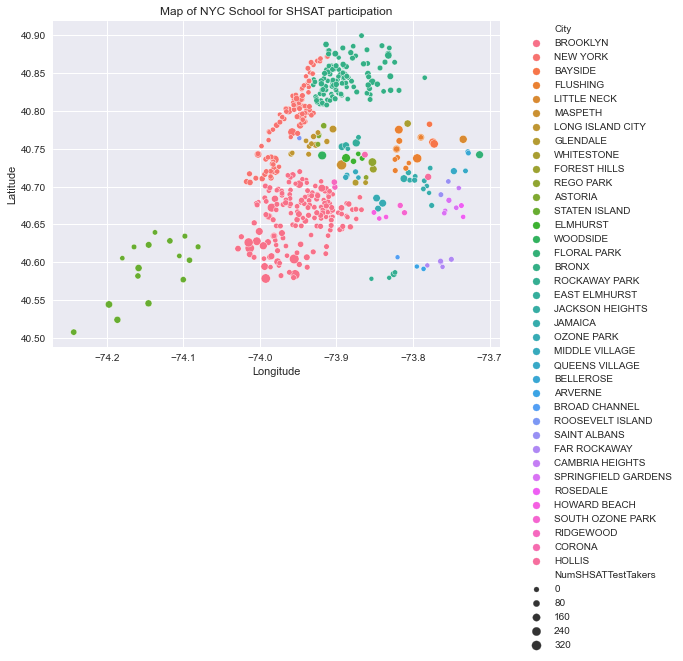

In [30]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.scatterplot(x="Longitude", y="Latitude", 
                size="NumSHSATTestTakers", hue="City",
                data=school_1)
plt.title("Map of NYC School for SHSAT participation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Text(0.5, 1.0, 'Map of NYC School for SHSAT participation')

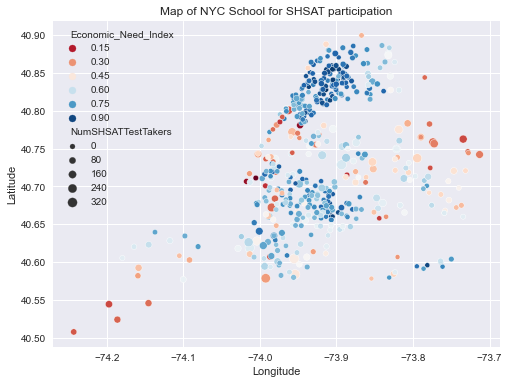

In [23]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.scatterplot(x="Longitude", y="Latitude", 
                size="NumSHSATTestTakers", hue="Economic_Need_Index",
                palette="RdBu", 
                data=school_1)
plt.title("Map of NYC School for SHSAT participation")

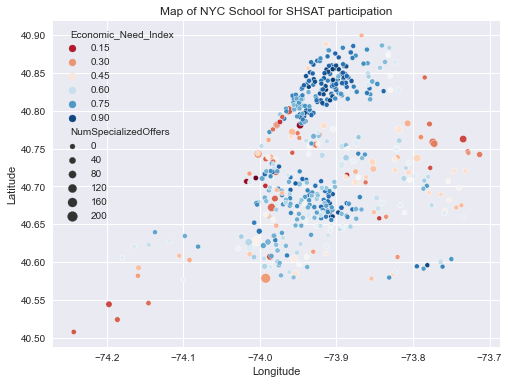

In [18]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.scatterplot(x="Longitude", y="Latitude", 
                size="NumSpecializedOffers", hue="Economic_Need_Index", 
                palette="RdBu",
                data=school_1)
plt.title("Map of NYC School for SHSAT participation")
plt.show()

Text(0.5, 1.0, 'Number of SHSAT takers')

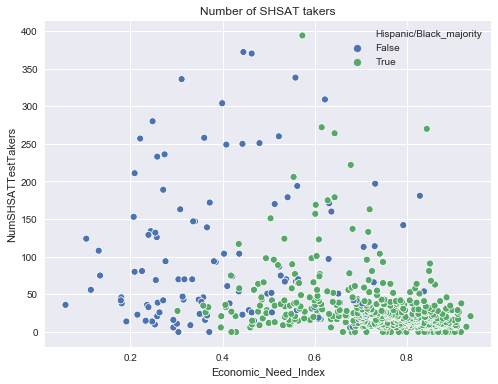

In [22]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.scatterplot(x="Economic_Need_Index", y="NumSHSATTestTakers", 
                hue="Hispanic/Black_majority",
                data=school_1)
plt.title("Number of SHSAT takers")

Text(0.5, 1.0, 'Number of SHSAT takers')

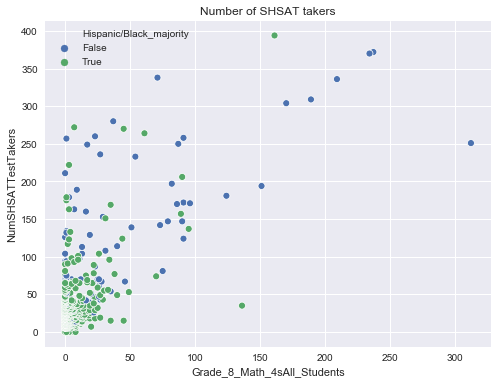

In [23]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.scatterplot(x="Grade_8_Math_4sAll_Students", y="NumSHSATTestTakers", 
                hue="Hispanic/Black_majority",
                data=school_1)
plt.title("Number of SHSAT takers")

Text(0.5, 1.0, 'Number of admission offers')

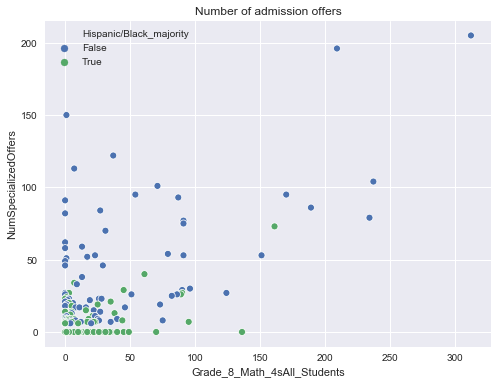

In [28]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.scatterplot(x="Grade_8_Math_4sAll_Students", y="NumSpecializedOffers", 
                hue="Hispanic/Black_majority",
                data=school_1)
plt.title("Number of admission offers")

Text(0.5, 1.0, 'Number of SHSAT takers')

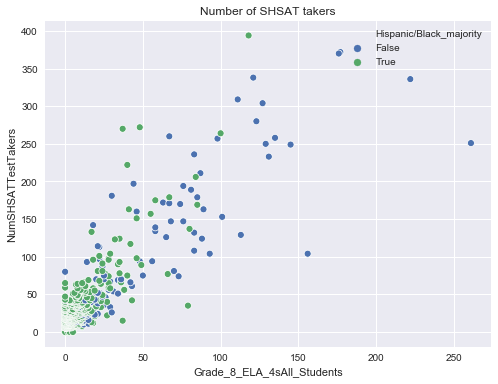

In [24]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.scatterplot(x="Grade_8_ELA_4sAll_Students", y="NumSHSATTestTakers", 
                hue="Hispanic/Black_majority",
                data=school_1)
plt.title("Number of SHSAT takers")

Text(0.5, 1.0, 'Number of admission offers')

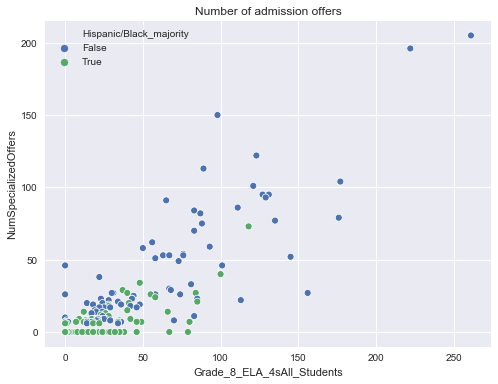

In [29]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.scatterplot(x="Grade_8_ELA_4sAll_Students", y="NumSpecializedOffers", 
                hue="Hispanic/Black_majority",
                data=school_1)
plt.title("Number of admission offers")

Text(0.5, 1.0, 'Number of SHSAT takers')

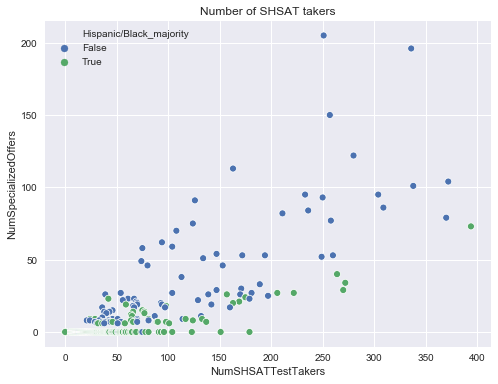

In [25]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.scatterplot(x="NumSHSATTestTakers", y="NumSpecializedOffers", 
                hue="Hispanic/Black_majority",
                data=school_1)
plt.title("Number of SHSAT takers")

Text(0.5, 0, 'Number of SHSAT takers')

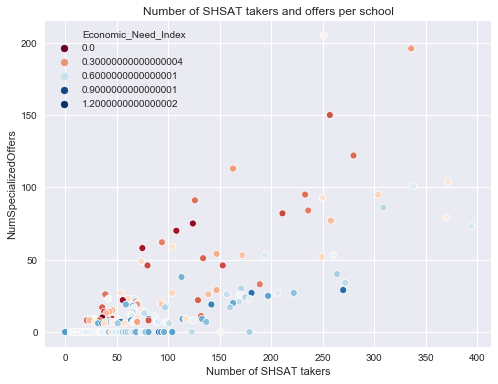

In [26]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.scatterplot(x="NumSHSATTestTakers", y="NumSpecializedOffers", 
                hue="Economic_Need_Index",
                palette = "RdBu",
                data=school_1)
plt.title("Number of SHSAT takers and offers per school")
plt.xlabel("Number of SHSAT takers")